# Importing libraries


In [262]:
## for data
import json
import pandas as pd
import numpy as np
import os
import re

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.0)
from wordcloud import WordCloud


from tqdm import tqdm

## for Hypothesis testing
from scipy import stats


# Helper Functions


In [263]:

# Function to convert list into strings

def device_toString(locations):
    "Function to convert list into strings"
    
    locations = [ str(i) for i in locations ]
    
    locations = [ re.sub('nan','',i) for i in locations ] 
                
    locations = ','.join(set(locations))
    
    return locations




# Get the data

In [264]:
# Let us load the data now.
DATA_PATH="./dataset/"
leads=pd.read_csv(DATA_PATH+"leads_v1.csv",low_memory=False)

# Explore  the data

In [265]:
leads.head()

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
0,22,Rajaa M.Mousa,Orange,Idea about the best area in Sheik Zaid .Also ...,2022-03-07 12:56:20.523509,form,unkown,google,dev sodic,sodic october plaza,0
1,30,Sahar Shalaby,Vodafone,NaN,2019-09-16 13:17:18.459000,facebook,o west fb creme de la creme cairo giza 27 60,facebook,orascom lead generation,o west,0
2,42,Mohamed,Vodafone,NaN,2022-05-07 02:03:53.589687,form,gouna properties,google,locations,el gouna for sale & resale,0
3,44,Maher Elnakib,Orange,NaN,2019-12-19 22:56:46.662000,facebook,new release north edge general with north coas...,facebook,city edge lead generation,north edge,0
4,48,pierre,Vodafone,NaN,2022-01-27 05:56:22.806753,form,unkown,google,dev inertia egypt,joulz,0


In [266]:
print("The shape of the data is -> {} \n ".format(leads.shape))
leads.info()

The shape of the data is -> (87668, 11) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87668 entries, 0 to 87667
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_id              87668 non-null  int64 
 1   customer_name        87668 non-null  object
 2   lead_mobile_network  87668 non-null  object
 3   message              5083 non-null   object
 4   lead_time            87668 non-null  object
 5   method_of_contact    87668 non-null  object
 6   ad_group             86947 non-null  object
 7   lead_source          87668 non-null  object
 8   campaign             87668 non-null  object
 9   location             87668 non-null  object
 10  low_qualified        87668 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 7.4+ MB


In [267]:
leads.astype("object").describe()

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
count,87668,87668,87668,5083,87668,87668,86947,87668,87668,87668,87668
unique,70017,53918,8,3604,87536,8,2396,10,741,2924,2
top,31069,Rubbish,Vodafone,Hi,2019-09-02 00:00:00.000000,facebook,unkown,facebook,unknown,unknown,0
freq,57,847,37261,38,38,49561,36519,51131,21839,12783,72408


In [268]:
top_lead_mobile_network_use=(leads.lead_mobile_network.value_counts())
top_lead_mobile_network_use=pd.DataFrame(top_lead_mobile_network_use).reset_index().rename(columns={"index":"lead_mobile_network","lead_mobile_network":"no_of_lead_mobile_network"})
top_lead_mobile_network_use["lead_mobile_networke_%"]=round((top_lead_mobile_network_use["no_of_lead_mobile_network"]/sum(top_lead_mobile_network_use["no_of_lead_mobile_network"]))*100,2)

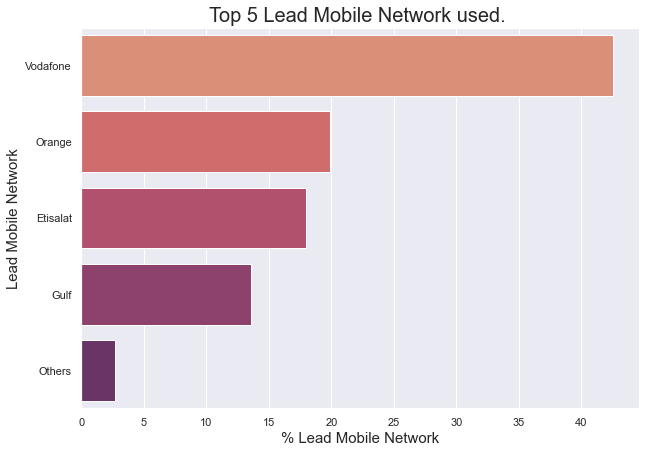

In [269]:
plt.figure(figsize=(10,7))
sns.barplot(x='lead_mobile_networke_%', y='lead_mobile_network', data=top_lead_mobile_network_use[:5],palette='flare');
plt.title("Top 5 Lead Mobile Network used. ",fontsize=20);
plt.xlabel('% Lead Mobile Network',fontsize=15)
plt.ylabel('Lead Mobile Network',fontsize=15);


From first look, it apperces than vodafone has hig

In [270]:
temp=pd.DataFrame((leads[leads['low_qualified']==0]['lead_mobile_network'].value_counts())/(leads['lead_mobile_network'].value_counts())).reset_index()

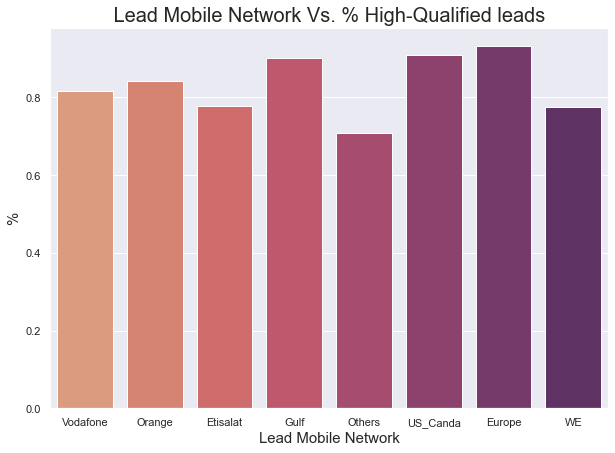

In [286]:

sns.barplot(x='index',y='lead_mobile_network',data=temp,palette='flare');

plt.title(" Lead Mobile Network Vs. % High-Qualified leads ",fontsize=20);
plt.xlabel('Lead Mobile Network',fontsize=15)
plt.ylabel('%',fontsize=15)
plt.show()

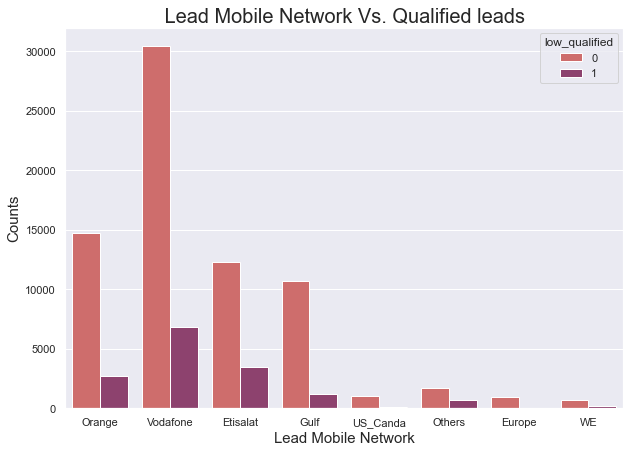

In [285]:
sns.countplot(x='lead_mobile_network',hue='low_qualified',data=leads,palette='flare');
plt.title(" Lead Mobile Network Vs. Qualified leads ",fontsize=20);
plt.xlabel('Lead Mobile Network',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

From first look, it apperces than **vodafone has highest leads** but **Europe & gulf have the highest quality**
* Around **80.4%** of leads used a **Vodafone and Etisalat, and Orange**.
* We have noticed that **Vodafone** user leads are **more than twice** as many as **Etisalat, and Orange** user leads used.
* An interesting insight is that **Vodafone network are extremely popular**. 

# Hypothesis Testing
Is there a relationship between Qualified leads and the Lead Mobile Network of the user?
    
   * H0: No relationship between Qualified leads and the Lead Mobile Network of the user.
   * H1: There is a relationship between Qualified leads and the Lead Mobile Network of the user.

We will assume our significance level, to be 0.05.


In [319]:
obs=pd.crosstab(index=leads['low_qualified'], columns=leads['lead_mobile_network'])
obs

lead_mobile_network,Etisalat,Europe,Gulf,Orange,Others,US_Canda,Vodafone,WE
low_qualified,,,,,,,,
0,12254,925,10731,14696,1677,1010,30454,661
1,3487,67,1165,2747,694,100,6807,193


In [292]:
chi2,p_value, dof, expected = stats.chi2_contingency(obs)
print('chi2= %.3f, p= %.25f' % (chi2, p_value))
print("-"*35)

if p_value < 0.05:
    print('Ho: There is no relationship between Qualified leads and the Lead Mobile Network of the user will be rejected.\n')
    print('There is a relationship between Qualified leads and the Lead Mobile Network of the user.')
else: 
    print('Ho: There is no relationship between Qualified leads and the Lead Mobile Network of the user IS TRUE!')

chi2= 1159.712, p= 0.0000000000000000000000000
-----------------------------------
Ho: There is no relationship between Qualified leads and the Lead Mobile Network of the user will be rejected.

There is a relationship between Qualified leads and the Lead Mobile Network of the user.


### Let see the most frequent words for  high qualified lead.

In [273]:
high_qualified = leads[leads['low_qualified'] == 0]

100%|██████████████████████████████████████████████████████████████████████████| 3880/3880 [00:00<00:00, 279952.17it/s]


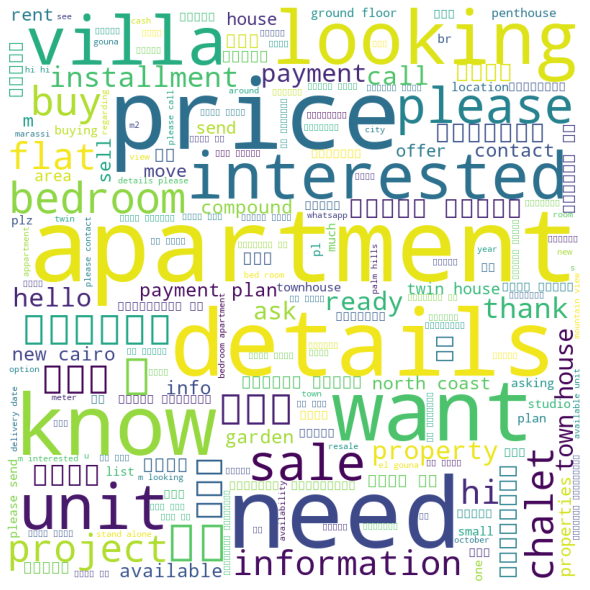

In [274]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(high_qualified[~(high_qualified['message'].isna())]['message']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

We noticed high qualified lead ask more specific relate to real estate like apartment or villa or brdrooms, chalet

### Let see the most frequent words for  low qualified lead.

In [275]:
low_qualified = leads[leads['low_qualified'] == 1]

100%|██████████████████████████████████████████████████████████████████████████████████████| 1203/1203 [00:00<?, ?it/s]


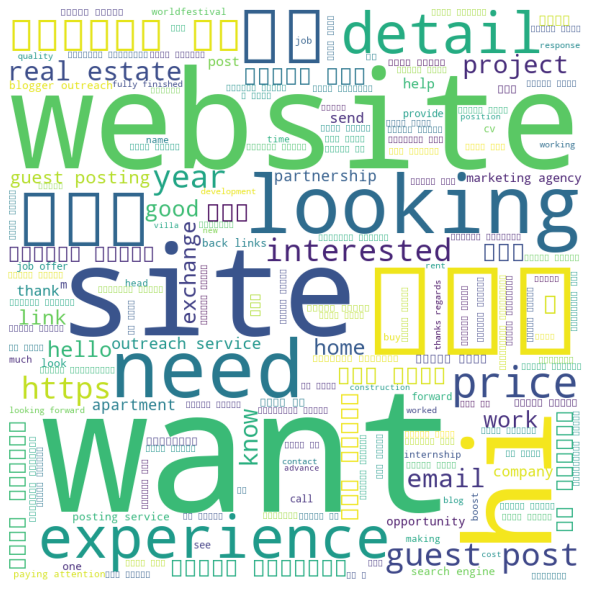

In [276]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(low_qualified[~(low_qualified['message'].isna())]['message']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

We noticed low qualified lead is more looking or just checking

In [277]:
leads['lead_time']=pd.to_datetime(leads['lead_time'],errors='coerce')
leads['lead_time_year']=leads['lead_time'].dt.year
leads['lead_time_month']=leads['lead_time'].dt.month
leads['lead_time_day']=leads['lead_time'].dt.day
leads['lead_time_dow']=leads['lead_time'].dt.day_name()
leads['lead_time_hour']=leads['lead_time'].dt.hour
leads['lead_time']=pd.to_datetime(leads['lead_time'],errors='coerce',format="%Y-%m-%d")


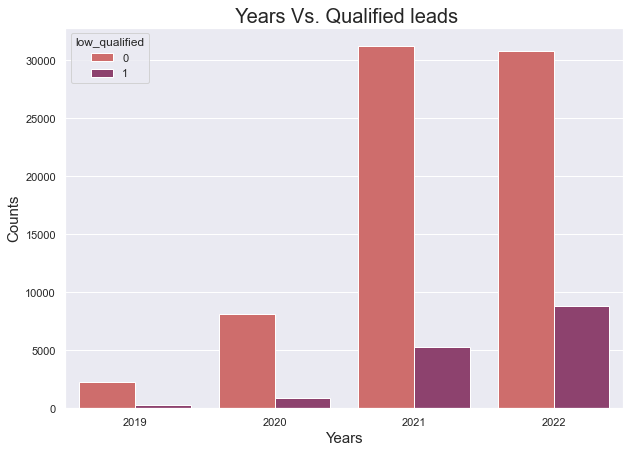

In [284]:
sns.countplot(x='lead_time_year',hue='low_qualified',data=leads,palette='flare');
plt.title(" Years Vs. Qualified leads",fontsize=20);
plt.xlabel('Years',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

In [298]:
obs=pd.crosstab(index=leads['lead_time_hour'], columns=leads['low_qualified'])

chi2,p_value, dof, expected = stats.chi2_contingency(obs)
print('chi2= %.3f, p= %.25f' % (chi2, p_value))
print("-"*35)

if p_value < 0.05:
    print('Ho: There is no relationship between Qualified leads and the Lead Mobile Network of the user will be rejected.\n')
    print('There is a relationship between Qualified leads and the Lead Mobile Network of the user.')
else: 
    print('Ho: There is no relationship between Qualified leads and the Lead Mobile Network of the user IS TRUE!')

chi2= 32.058, p= 0.0989382044849768799155143
-----------------------------------
Ho: There is no relationship between Qualified leads and the Lead Mobile Network of the user IS TRUE!


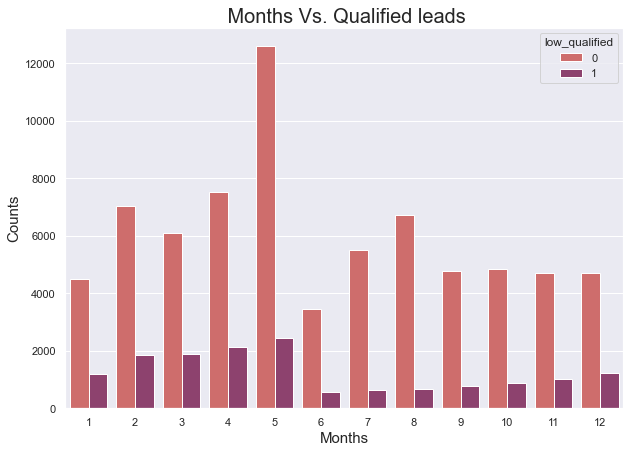

In [283]:
sns.countplot(x='lead_time_month',hue='low_qualified',data=leads,palette='flare');
plt.title(" Months Vs. Qualified leads",fontsize=20);
plt.xlabel('Months',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

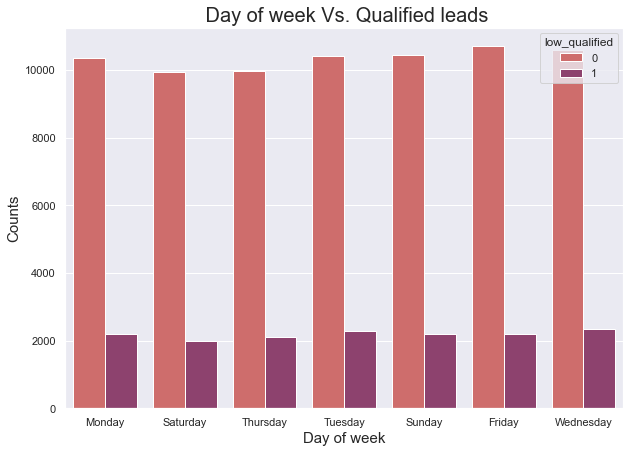

In [307]:
sns.countplot(x='lead_time_dow',hue='low_qualified',data=leads,palette='flare');
plt.title(" Day of week Vs. Qualified leads",fontsize=20);
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

# Hypothesis Testing
Is there a relationship between Qualified leads and day of week?
    
   * H0: No relationship between Qualified leads and day of week.
   * H1: There is a relationship between Qualified leads and day of week.

We will assume our significance level, to be 0.05.


In [300]:
obs=pd.crosstab(index=leads['lead_time_dow'], columns=leads['low_qualified'])
obs

low_qualified,0,1
lead_time_dow,,
Friday,10709,2194
Monday,10342,2182
Saturday,9935,1974
Sunday,10447,2185
Thursday,9975,2110
Tuesday,10406,2279
Wednesday,10594,2336


In [301]:
chi2,p_value, dof, expected = stats.chi2_contingency(obs)
print('chi2= %.3f, p= %.25f' % (chi2, p_value))
print("-"*35)

if p_value < 0.05:
    print('Ho: There is no relationship between Qualified leads and day of week will be rejected.\n')
    print('There is a relationship between Qualified leads and day of week.')
else: 
    print('Ho: There is no relationship between Qualified leads and day of week IS TRUE!')

chi2= 13.985, p= 0.0298089146363129942063352
-----------------------------------
Ho: There is no relationship between Qualified leads and day of week will be rejected.

There is a relationship between Qualified leads and day of week.


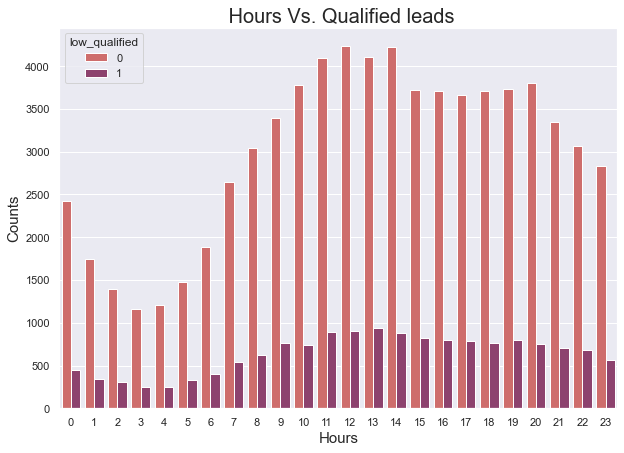

In [308]:
sns.countplot(x='lead_time_hour',hue='low_qualified',data=leads,palette='flare');
plt.title(" Hours Vs. Qualified leads",fontsize=20);
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

# Hypothesis Testing
Is there a relationship between Qualified leads and hour of the day?
    
   * H0: No relationship between Qualified leads and hour of the day.
   * H1: There is a relationship between Qualified leads and hour of the day.

We will assume our significance level, to be 0.05.


In [304]:
obs=pd.crosstab(index=leads['low_qualified'], columns=leads['lead_time_hour'])
obs

lead_time_hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
low_qualified,,,,,,,,,,,,,,,,,,,,,,,,
0,2428,1749,1395,1160,1213,1471,1881,2650,3046,3389,3777,4098,4236,4112,4220,3726,3710,3662,3710,3730,3805,3343,3068,2829
1,443,342,307,248,248,335,401,539,618,759,739,896,901,939,883,822,796,784,762,793,755,706,679,565


In [305]:
chi2,p_value, dof, expected = stats.chi2_contingency(obs)
print('chi2= %.3f, p= %.25f' % (chi2, p_value))
print("-"*35)

if p_value < 0.05:
    print('Ho: There is no relationship between Qualified leads and hour of the day will be rejected.\n')
    print('There is a relationship between Qualified leads and hour of the day.')
else: 
    print('Ho: There is no relationship between Qualified leads and hour of the day IS TRUE!')

chi2= 32.058, p= 0.0989382044849768799155143
-----------------------------------
Ho: There is no relationship between Qualified leads and hour of the day IS TRUE!


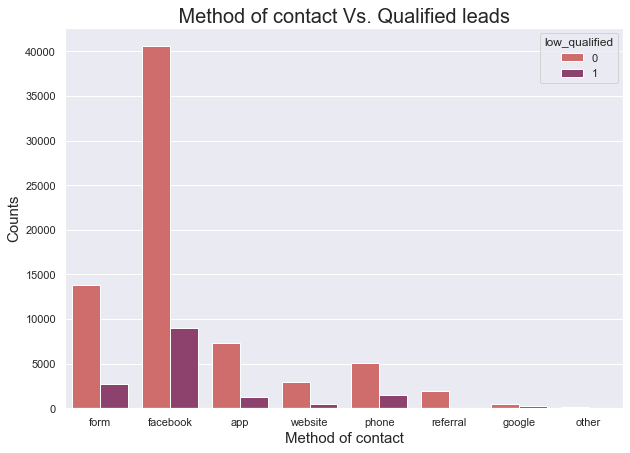

In [317]:
sns.countplot(x='method_of_contact',hue='low_qualified',data=leads,palette='flare');
plt.title(" Method of contact Vs. Qualified leads ",fontsize=20);
plt.xlabel('Method of contact',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

# Hypothesis Testing
Is there a relationship between Qualified leads and Method of contact?
    
   * H0: No relationship between Qualified leads and Method of contact.
   * H1: There is a relationship between Qualified leads and Method of contact.

We will assume our significance level, to be 0.05.


In [315]:
obs=pd.crosstab(index=leads['low_qualified'], columns=leads['method_of_contact'])
obs

method_of_contact,app,facebook,form,google,other,phone,referral,website
low_qualified,,,,,,,,
0,7372,40604,13769,503,136,5107,1924,2993
1,1258,8957,2763,265,30,1445,50,492


In [316]:
chi2,p_value, dof, expected = stats.chi2_contingency(obs)
print('chi2= %.3f, p= %.25f' % (chi2, p_value))
print("-"*35)

if p_value < 0.05:
    print('Ho: There is no relationship between Qualified leads and hour of the day will be rejected.\n')
    print('There is a relationship between Qualified leads and hour of the day.')
else: 
    print('Ho: There is no relationship between Qualified leads and hour of the day IS TRUE!')

chi2= 653.540, p= 0.0000000000000000000000000
-----------------------------------
Ho: There is no relationship between Qualified leads and hour of the day will be rejected.

There is a relationship between Qualified leads and hour of the day.


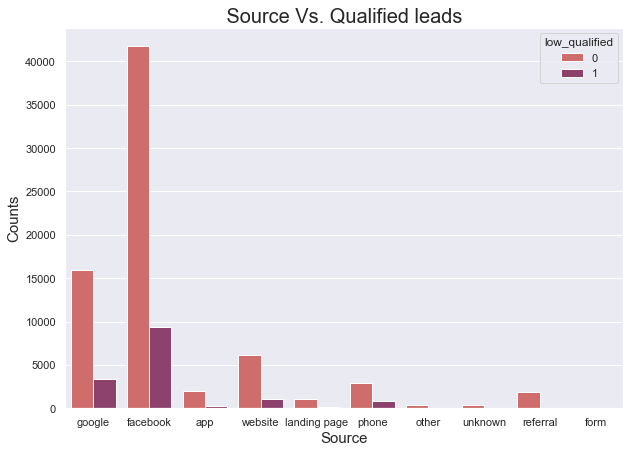

In [318]:
sns.countplot(x='lead_source',hue='low_qualified',data=leads,palette='flare');
plt.title(" Source Vs. Qualified leads ",fontsize=20);
plt.xlabel('Source',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

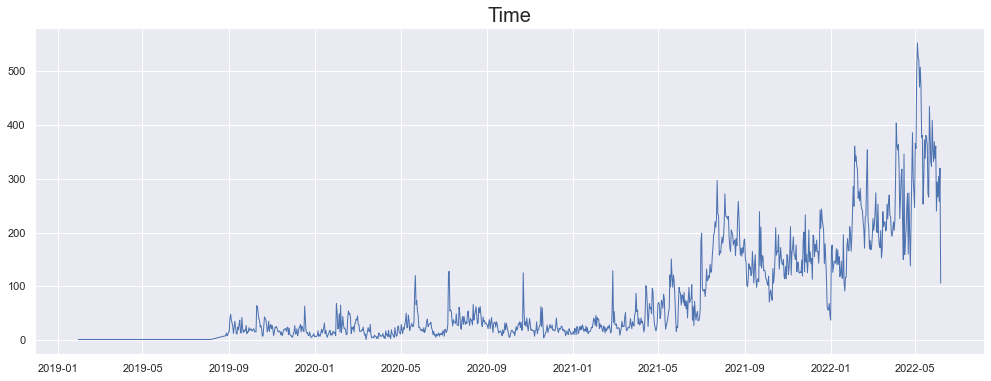

In [322]:
plt.figure(figsize=(17,6))

leads['lead_time'].dt.date.value_counts().plot(kind='line', linewidth=1)
plt.title('Time',fontsize=20);

plt.show()

In [232]:
leads.to_csv("./dataset/leads_v2.csv",index=False)